In [21]:
import os
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from sklearn.linear_model import LinearRegression
import csv

workingdir = os.getcwd()
usedir = workingdir + '/../derivatives'
os.chdir(usedir)

ppi_df = pd.read_excel("ppi_wholebrain_scatterplot.xls")
SR_flist=[os.path.join(root, f) for root, dirs, files in os.walk('logs') for f in files if 'SR-Rating' in f]

# Setting up dataframes

In [22]:
temp = ppi_df
ASRD = pd.read_csv('../../istart/Shared_Reward/Behavioral_Analysis/Data_Out/AllSharedRewardData.csv')
APD = pd.read_excel('ISTART-ALL-Combined-042122.xlsx')
keepios = [col for col in APD.columns if col.startswith('ios') or col.startswith('sub')]
keepwinlose = [col for col in ASRD.columns if col.startswith('Win') or col.startswith('Lose') or col.startswith('sub')]
temp1 = pd.merge(APD[['sub','dudit_drugtype','audit_standard_score']], temp, on='sub', how = 'right')
temp2 = pd.merge(APD[keepios], temp1, on = 'sub', how = 'right')
temp3 = pd.merge(ASRD[keepwinlose], temp2, on='sub', how='right')
temp999 = temp3.drop_duplicates(subset=['Subject']).dropna(subset=['Subject'])

df = temp999.replace(999, np.NaN)

#creates difference scores for contrast between IOS closeness rating for each partner
df['ios_p']
df['ios_diff_computer'] = df['ios_p'] - df['ios_computer'] #ios_p was participant rating of frend, ios_fu was participant rating of stranger in follow-up. ios_f was FRIEND rating of participant
df['ios_diff_stranger'] = df['ios_p'] - df['ios_fu_score']

#creates difference scores for contrast between post-scan partner rating for each partner
df['Win_F_C'] = df['Win-Friend'] - df['Win-Comp']
df['Win_F_S'] = df['Win-Friend'] - df['Win-Stranger']
df['Diff_Friend'] = df['Win-Friend'] - df['Lose-Friend']
df['Diff_Stranger'] = df['Win-Stranger'] - df['Lose-Stranger']
df['Diff_Comp'] = df['Win-Comp'] - df['Lose-Comp']
df['Win_Lose_F_S'] = df['Diff_Friend'] - df['Diff_Stranger']
df['Win_Lose_F_C'] = df['Diff_Friend'] - df['Diff_Comp']

#creates difference scores for each contrast using pre-registered TPJ target activation extracted from whole-brain ppi analysis with VS seed
df['aTPJ_R_P_F_C'] = (df['aTPJ_VS_ppi_cope_04'] - df['aTPJ_VS_ppi_cope_03']) - (df['aTPJ_VS_ppi_cope_02'] - df['aTPJ_VS_ppi_cope_01'])
df['aTPJ_R_P_F_S'] = (df['aTPJ_VS_ppi_cope_04'] - df['aTPJ_VS_ppi_cope_03']) - (df['aTPJ_VS_ppi_cope_06'] - df['aTPJ_VS_ppi_cope_05'])
df['pTPJ_R_F_S'] = (df['pTPJ_VS_ppi_cope_04'] - df['pTPJ_VS_ppi_cope_06'])
df['pTPJ_R_P_F_C'] = (df['pTPJ_VS_ppi_cope_04'] - df['pTPJ_VS_ppi_cope_03']) - (df['pTPJ_VS_ppi_cope_02'] - df['pTPJ_VS_ppi_cope_01'])
df['pTPJ_R_P_F_S'] = (df['pTPJ_VS_ppi_cope_04'] - df['pTPJ_VS_ppi_cope_03']) - (df['pTPJ_VS_ppi_cope_06'] - df['pTPJ_VS_ppi_cope_05'])

#dataframes sans NaNs
df_ios = df.dropna(subset=['ios_diff_computer'])
df_psr = df.dropna(subset = ['Win_F_S'])
df_both = df_psr.dropna(subset=['ios_diff_computer'])

pd.set_option('display.max_columns',None,'display.max_rows', None)


# Correlation Matrix for all data

,sub,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,Lose-Comp,ios_fu_score,ios_computer,ios_f,ios_p,audit_standard_score,Subject,Ones,SU,RS,RS_square,SUxRS,SUxRS_sq,tsnr,fd_mean,ppi_c9_F-C_sub-neg_type-ppi_seed-VS_thr5_cope-09,ppi_C10_FS-C_z8_sub-neg_cluster1_type-ppi_seed-VS_thr5_cope-10,ppi_C10_FS-C_z8_sub-neg_cluster2_type-ppi_seed-VS_thr5_cope-10,ppi_C13_rew-pun_F-C_z1_main-effect_type-ppi_seed-VS_thr5_cope-13,ppi_C13_rew-pun_F-C_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-13,ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16,ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-15_rew_S-C,ppi_C16_rew_F-C_z1_main-effect_cluster2_type-ppi_seed-VS_thr5_cope-16,ppi_C21_rew_F-SC_z1_main-effect_type-ppi_seed-VS_thr5_cope-21,ppi_C23_rew-pun_F-SC_z12_su-rs2-neg_cluster3_type-ppi_seed-VS_thr5_cope-23,Unnamed: 19,act_C13_rew-pun_F-C_z9_rs-neg_cluster1_type-act_cope-13,act_C13_rew-pun_F-C_z9_rs-neg_cluster2_type-act_cope-13,act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13,act_C14_rew_F-S_z2_sub_type-act_cope-14,act_C16_rew_F-C_z2_sub_cluster1_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster2_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster3_type-act_cope-16,Unnamed: 27,aTPJ_VS_ppi_cope_01,aTPJ_VS_ppi_cope_02,aTPJ_VS_ppi_cope_03,aTPJ_VS_ppi_cope_04,aTPJ_VS_ppi_cope_05,aTPJ_VS_ppi_cope_06,pTPJ_VS_ppi_cope_01,pTPJ_VS_ppi_cope_02,pTPJ_VS_ppi_cope_03,pTPJ_VS_ppi_cope_04,pTPJ_VS_ppi_cope_05,pTPJ_VS_ppi_cope_06,VS_seed_F_S,VS_seed_F_C,win_C,win_F,win_S,Unnamed: 46,act_c14_VS-wholebrain_rew-F-S_zstat1_cluster1,act_VS-seed_11-rew-pun_F-S,act_VS-seed_13-rew-pun_F-C,act_VS-seed_14-rew_F-S,act_VS-seed_16-rew_F-C,act_VS-seed_21-rew_F-SC,act_VS-seed_23-rew-pun_F-SC,ios_diff_computer,ios_diff_stranger,Win_F_C,Win_F_S,Diff_Friend,Diff_Stranger,Diff_Comp,Win_Lose_F_S,Win_Lose_F_C,aTPJ_R_P_F_C,aTPJ_R_P_F_S,pTPJ_R_F_S,pTPJ_R_P_F_C,pTPJ_R_P_F_S
sub,1.0***,0.21,0.02,-0.06,-0.26,-0.11,0.03,0.3,0.52**,-0.11,0.23,-0.22,1.0***,nan,0.03,-0.01,0.02,0.02,-0.23,-0.16,0.08,-0.24,-0.21,-0.21,-0.33*,0.37*,-0.01,-0.03,-0.22,-0.25,0.19,nan,-0.04,-0.0,-0.0,-0.08,0.04,-0.0,0.04,nan,0.13,-0.07,0.06,0.03,0.14,0.2,0.01,0.03,0.08,0.08,0.06,0.21,0.0,0.0,-0.05,-0.09,-0.07,nan,-0.05,-0.16,-0.03,-0.0,-0.0,0.02,-0.08,-0.24,-0.06,0.19,0.14,0.29,0.07,-0.08,0.2,0.3*,0.08,-0.06,-0.12,-0.02,-0.1
Win-Friend,0.21,1.0***,0.37*,0.18,-0.36*,-0.19,-0.1,0.12,0.17,0.13,0.26,-0.09,0.21,nan,0.02,0.2,0.21,0.04,0.03,-0.01,0.13,-0.13,-0.02,-0.02,-0.17,0.04,0.1,0.03,0.03,-0.06,-0.09,nan,-0.08,-0.17,-0.01,-0.17,-0.14,0.12,-0.06,nan,-0.12,0.01,-0.14,0.01,-0.02,-0.03,-0.12,-0.15,0.12,0.01,-0.08,0.04,-0.2,-0.11,0.07,-0.07,0.16,nan,-0.09,-0.29,-0.24,-0.21,-0.11,-0.19,-0.31*,0.13,0.16,0.44**,0.38*,0.77***,0.36*,0.23,0.38*,0.48**,0.03,0.11,-0.03,-0.04,-0.13
Win-Stranger,0.02,0.37*,1.0***,0.37*,-0.24,-0.33*,-0.21,0.23,0.2,0.4**,0.36*,-0.09,0.02,nan,-0.01,-0.02,0.02,0.14,0.11,0.07,0.21,-0.06,0.0,0.0,-0.38*,0.06,0.12,-0.02,-0.24,-0.24,-0.12,nan,-0.16,-0.11,-0.19,-0.34*,-0.47**,0.09,-0.02,nan,-0.27,-0.03,-0.0,-0.03,-0.05,-0.14,-0.26,0.12,0.09,0.06,-0.01,-0.05,-0.06,-0.29,0.42**,0.19,0.23,nan,-0.33*,-0.05,-0.24,-0.06,-0.28,-0.22,-0.2,0.22,0.19,-0.11,-0.72***,0.36*,0.87***,0.46**,-0.47**,-0.05,-0.14,0.04,0.08,-0.24,-0.01
Win-Comp,-0.06,0.18,0.37*,1.0***,0.02,-0.01,0.15,-0.19,0.09,0.08,0.12,-0.11,-0.06,nan,0.08,-0.2,-0.18,0.18,-0.07,-0.05,0.07,-0.05,-0.03,-0.03,-0.23,0.22,-0.04,0.09,-0.18,-0.2,0.02,nan,-0.12,0.05,0.12,-0.09,-0.06,0.31*,0.11,nan,-0.12,-0.01,-0.02,-0.09,0.15,0.13,-0.22,-0.23,-0.11,-0.26,0.02,-0.16,-0.03,-0.25,0.26,-0.02,0.02,nan,0.09,0.02,-0.26,-0.03,-0.24,-0.21,-0.19,0.03,0.22,-0.8***,-0.23,0.08,0.26,0.77***,-0.16,-0.53***,-0.08,-0.04,-0.06,-0.04,0.04
Lose-Friend,-0.26,-0.36*,-0.24,0.02,1.0***,0.28,0.35*,-0.27,-0.33,0.0,-0.21,0.26,-0.26,nan,0.04,-0.09,-0.13,0.03,0.11,0.02,-0.1,0.15,0.13,0.13,0.06,-0.03,-0.13,0.0,0.13,0.12,-0.18,nan,0.08,0.1,0.07,0.33*,0.3*,0.1,-0.02,nan,-0.08,-0.25,0.01,-0.21,-0.23,-0.11,0.02,-0.18,-0.16,-0.24,0.04,-0.24,0.16,-0

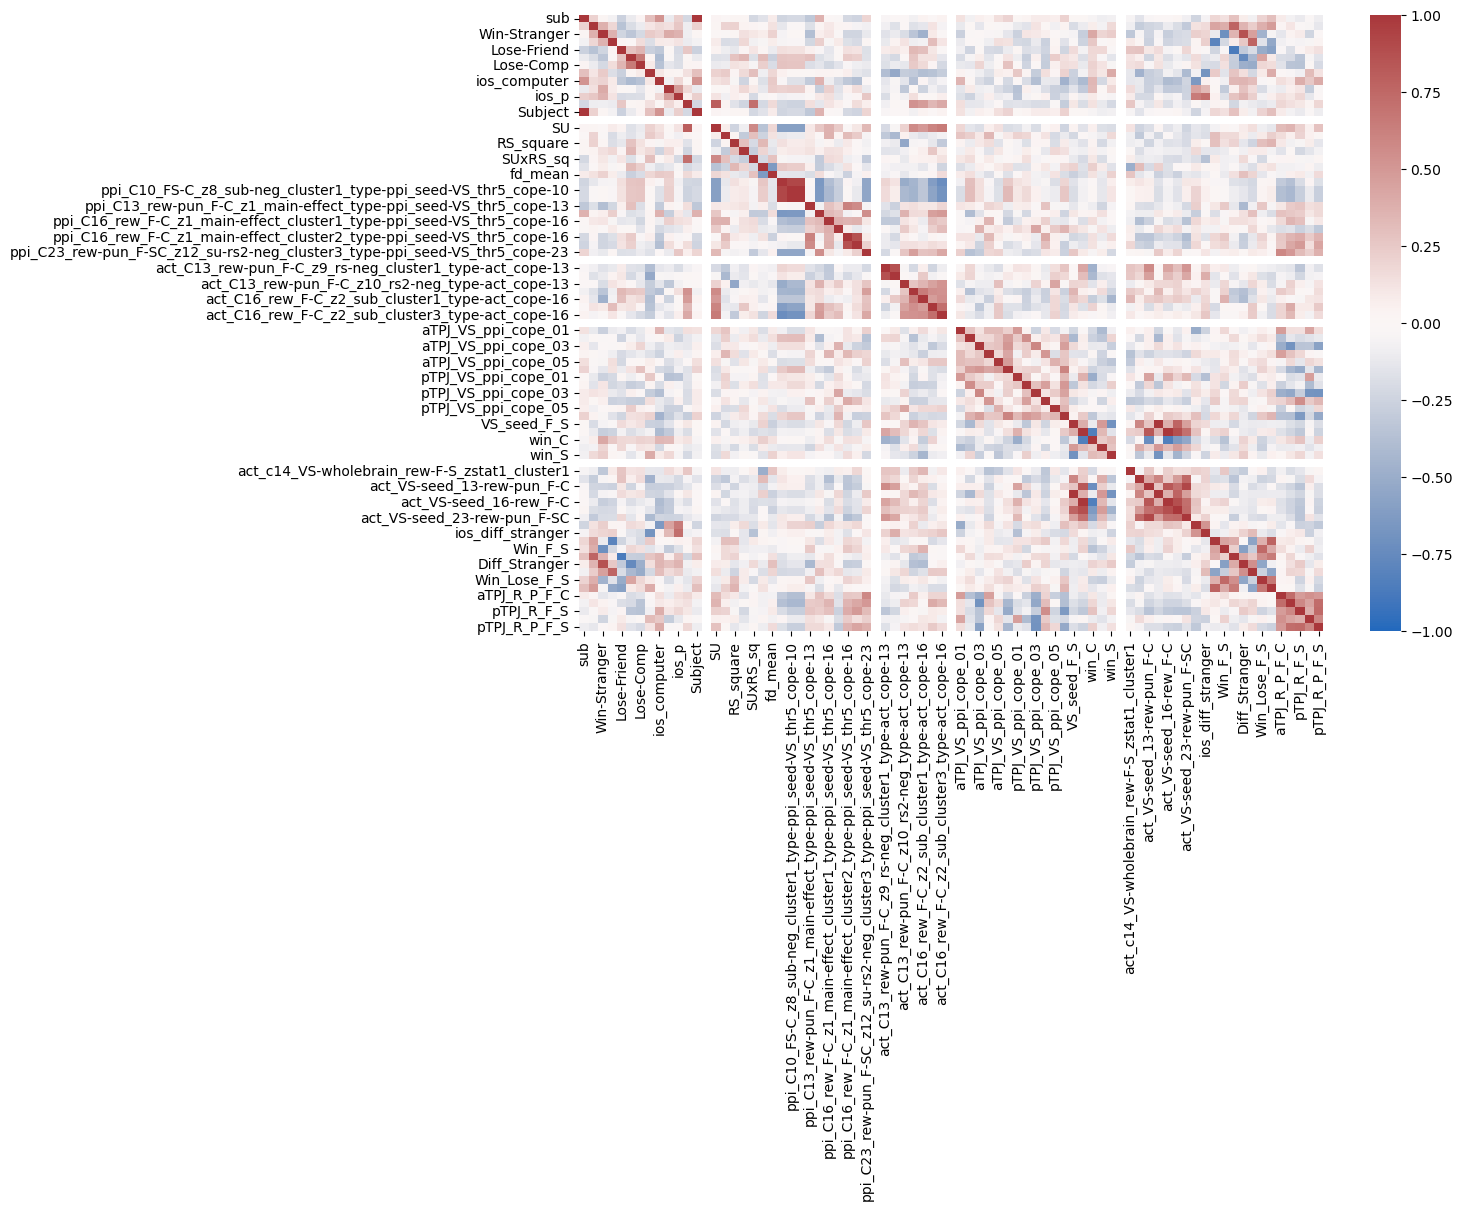

In [25]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.001, .01, .05] if x<=t]))
cormat = rho.round(2).astype(str) + p
display(cormat)

fig = plt.figure(figsize=(12, 8))
sns.heatmap(rho,cmap='vlag',vmin=-1)
plt.show()

# Participant demographics for AUDIT and DUDIT

In [26]:
#All audit and dudit responses can be found in ISTART-All-Combined spreadsheet (found in derivatives) or phenotype .tsv files. Keys to interpreting numeric responses as drug types can be found in the phenotype .json files.
drug_type_list = df['dudit_drugtype'].tolist() #creates list of all dudit responses regarding drug type
audit_score_list = df['audit_standard_score'].tolist() #creates list of all audit scores, used to determine whether participants reached clinical threshold
print(drug_type_list, audit_score_list, df['dudit_drugtype'].unique()) #prints out above, as well as discrete drug usage types in the sample
len(audit_score_list) #number of participants who completed audit (and had scan data for shared reward task as well)

[0, nan, 0, 1, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, 1, nan, nan, nan, '1,5', nan, nan, nan, 1, 1, nan, nan, 1, nan, 1, nan, 1, nan, nan, nan, 1, '1,5', 1, nan, nan, 1, nan, nan, '1,2', nan] [6.666666667, 1.0, 1.0, 14.0, 0.0, 0.0, 2.222222222, 13.0, 1.0, 5.0, 3.0, 10.0, 3.0, 7.0, 0.0, 3.0, 2.0, 6.0, 0.0, 4.0, 2.0, 1.0, 5.0, 6.0, 11.0, 2.0, 0.0, 3.0, 5.555555556, 8.0, 5.0, 2.0, 1.0, 0.0, 1.0, 5.0, 1.0, 1.0, 3.0, 0.0, 6.0, 1.0, 0.0, 5.0, 5.0] [0 nan 1 '1,5' '1,2']


45

# Formatting and Behavioral Checks on Closeness Ratings (IOS scores)

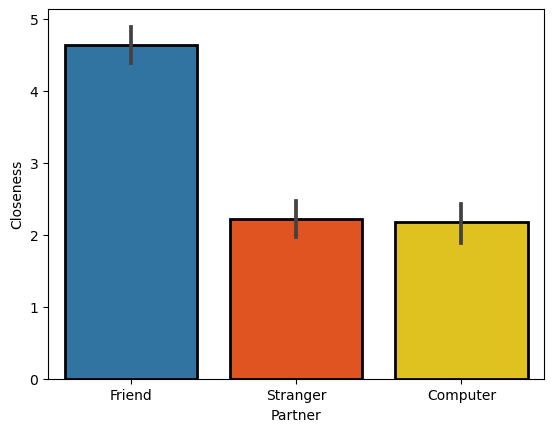

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
Partner 30.4960 2.0000 54.0000 0.0000



In [28]:
plt_df = df_ios[['Subject', 'ios_p', 'ios_fu_score','ios_computer']].copy()
plt_df.columns = ['Subject', 'Friend', 'Stranger', 'Computer']
plt_df = plt_df.melt(id_vars=['Subject'], value_vars=['Friend', 'Stranger', 'Computer'], var_name='Partner', value_name='Closeness')
fig_closeness = sns.barplot(x = 'Partner', y = 'Closeness',data=plt_df, ci=68,
                            palette=['tab:blue','orangered','gold'], edgecolor='black', linewidth=2)
#plt.savefig('../../istart-sharedreward/derivatives/Figures/mean_closeness.svg')
plt.show()

plt_df_anova = AnovaRM(plt_df, 'Closeness', 'Subject', within=['Partner'])
plt_df_results = plt_df_anova.fit()

print(plt_df_results)

# Histograms of substance use and reward sensitivity

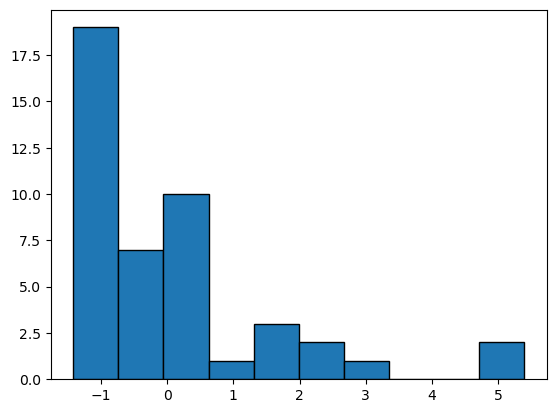

		   Individual Differences - Substance Use



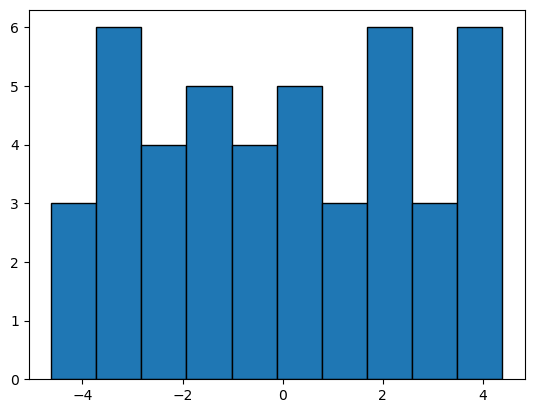

		   Individual Differences - Reward Sensitivity



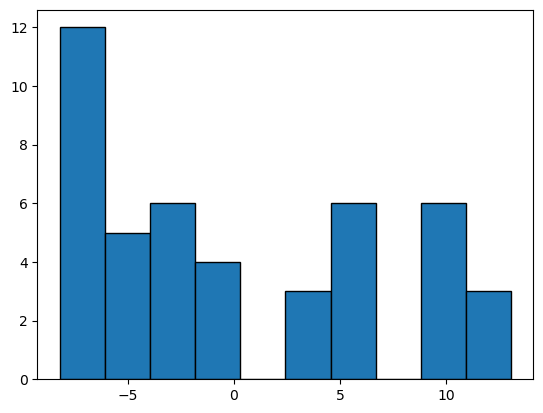

		   Individual Differences - Reward Sensitivity Squared



In [29]:
plt.hist(df['SU'], edgecolor='k')
plt.show()
print('\t\t   Individual Differences - Substance Use\n')

plt.hist(df['RS'], edgecolor='k')
plt.show()
print('\t\t   Individual Differences - Reward Sensitivity\n')

plt.hist(df['RS_square'], edgecolor='k')
plt.show()
print('\t\t   Individual Differences - Reward Sensitivity Squared\n')

### Preliminary Checks of independent relations between VS-rFFA activation and individual difference measures (full linear regressions in Rstudio code)

Reward Sensitivity correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.3746133442589799 ; p: 0.01123390641902428


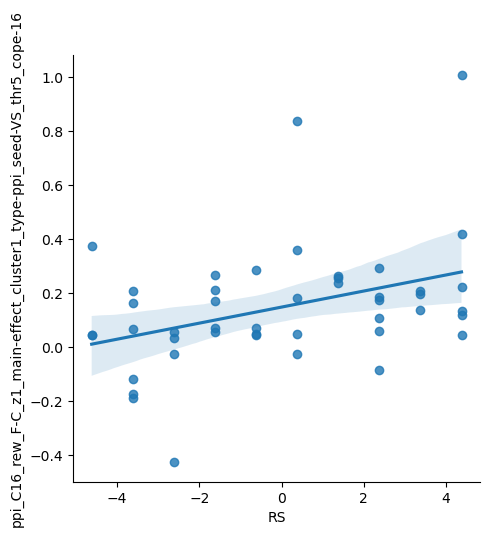

<class 'seaborn.axisgrid.FacetGrid'>
Substance Use correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.3594765837245274 ; p: 0.015297112260920136


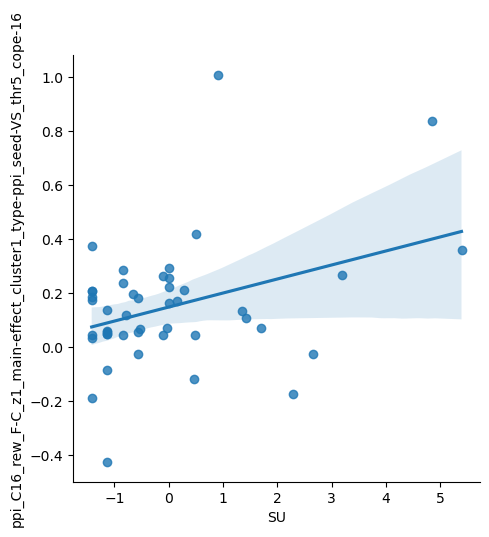

<class 'seaborn.axisgrid.FacetGrid'>
RS*SU correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.13618626962191308 ; p: 0.3723804261097893


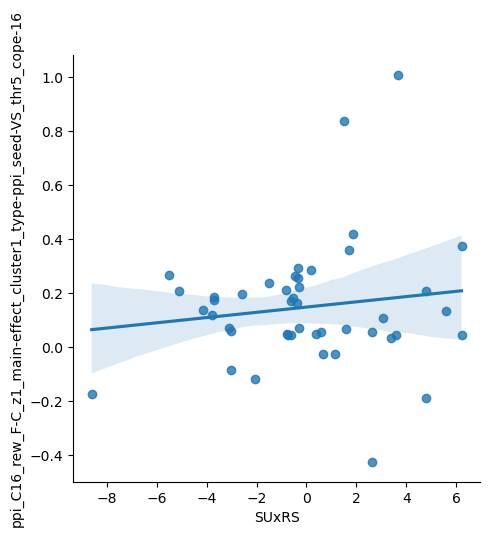

<class 'seaborn.axisgrid.FacetGrid'>


In [17]:
r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['RS'])
print("Reward Sensitivity correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="RS", data=df, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['SU'])
print("Substance Use correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="SU", data=df, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['SUxRS'])
print("RS*SU correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="SUxRS", data=df, order=1)
plt.show()
print(type(fig))

## Checks for significance between Post-Scan Behavioral Ratings and RS

Win_Friend and RS - linear
r: 0.19757954595168203 ; p: 0.20408434749314172


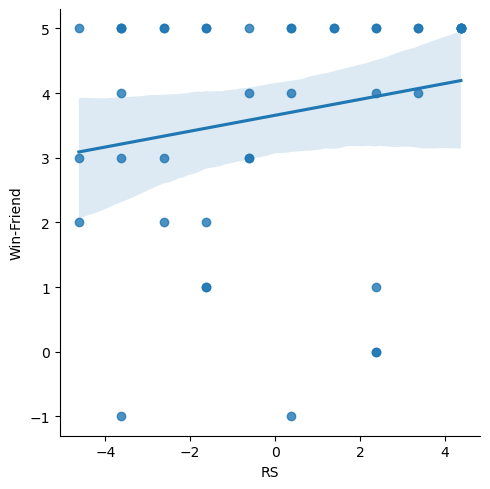

<class 'seaborn.axisgrid.FacetGrid'>
Win_Friend and RS - curvilinear
r: 0.20501705002972334 ; p: 0.18722557635419232


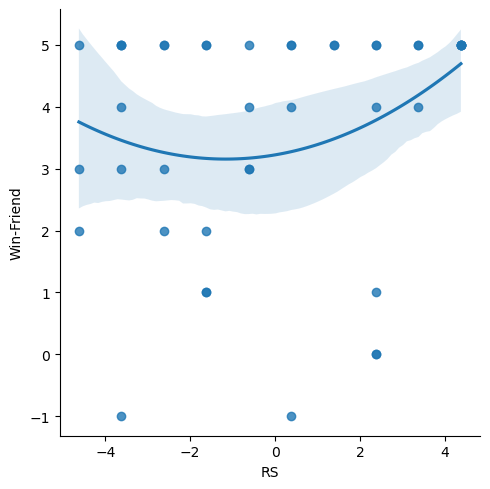

<class 'seaborn.axisgrid.FacetGrid'>
Win_Comp and RS - linear
r: -0.19540593796468303 ; p: 0.20920605221248326


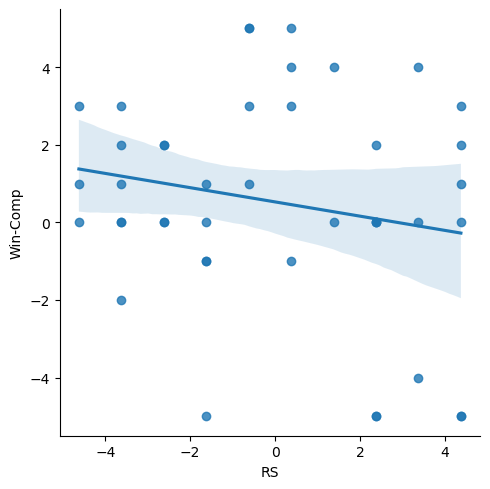

<class 'seaborn.axisgrid.FacetGrid'>
Win_Comp and RS - curvilinear
r: -0.18484154885278742 ; p: 0.23537405017761157


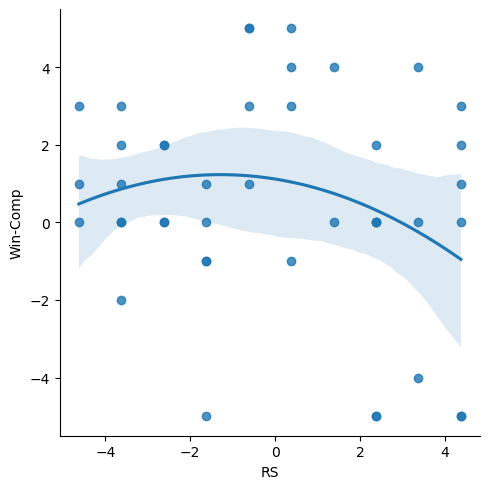

<class 'seaborn.axisgrid.FacetGrid'>


In [34]:
r,p = stats.pearsonr(df_psr['Win-Friend'], df_psr['RS'])
print("Win_Friend and RS - linear\nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="Win-Friend",x="RS", data=df_psr, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df_psr['Win-Friend'], df_psr['RS_square'])
print("Win_Friend and RS - curvilinear\nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="Win-Friend",x="RS", data=df_psr, order=2)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df_psr['Win-Comp'], df_psr['RS'])
print("Win_Comp and RS - linear\nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="Win-Comp",x="RS", data=df_psr, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df_psr['Win-Comp'], df_psr['RS_square'])
print("Win_Comp and RS - curvilinear\nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="Win-Comp",x="RS", data=df_psr, order=2)
plt.show()
print(type(fig))

## Check for correlation between post-scan partner ratings and closeness (IOS)

Difference b/w friend and stranger for: Post-Scan Ratings vs Closeness -  r: -0.08156972693500016 ; p: 0.6858686472949822


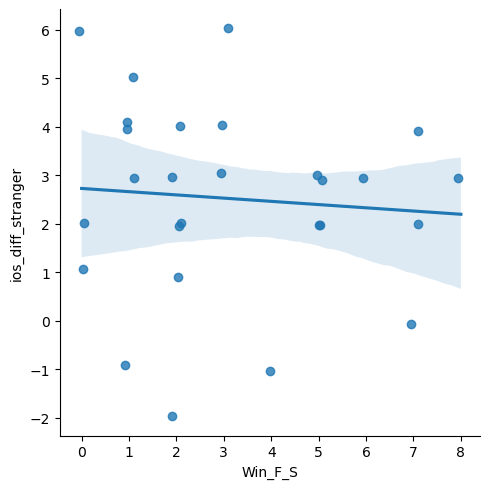

<class 'seaborn.axisgrid.FacetGrid'>
Difference b/w friend and computer for: Post-Scan Ratings vs Closeness -  r: 0.03620400953500384 ; p: 0.8577191741691029


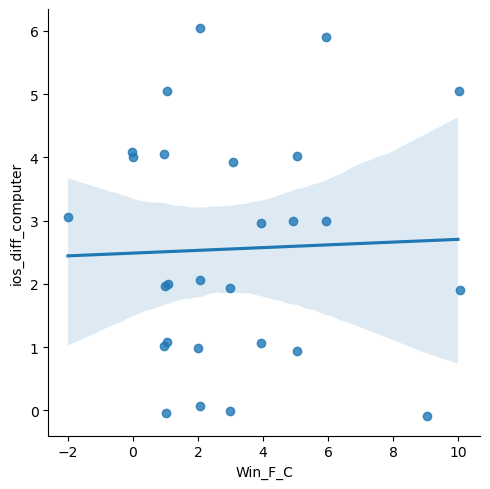

<class 'seaborn.axisgrid.FacetGrid'>


In [43]:
r,p = stats.pearsonr(df_both['Win_F_S'], df_both['ios_diff_stranger'])
print("Difference b/w friend and stranger for: Post-Scan Ratings vs Closeness -  r: %s ; p: %s" %(r,p))

g=sns.lmplot(x='Win_F_S',y='ios_diff_stranger',data=df_ios, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

#df_ios['']
r,p = stats.pearsonr(df_both['Win_F_C'], df_both['ios_diff_computer'])
print("Difference b/w friend and computer for: Post-Scan Ratings vs Closeness -  r: %s ; p: %s" %(r,p))

g=sns.lmplot(x='Win_F_C',y='ios_diff_computer',data=df_both, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

# Recreate long-form Post-Scan Ratings dataframe from original data

In [49]:
os.chdir('../../istart/Shared_Reward')
#Make a list of all the SR Files
SR_flist=[os.path.join(root, f) for root, dirs, files in os.walk('logs') for f in files if 'SR-Rating' in f]

#Make a list of Dataframes
ratings_list=[]
for f in SR_flist:
    sub=re.search('sub(.*)_',f).group(1)
    if any(i.isdigit() for i in sub):
        tmp_df=pd.read_csv(f)
        tmp_df['sub']=sub
        if len(tmp_df)==6:
            ratings_list.append(tmp_df)
#Concatonate the DataFrames together
srpr_df=pd.concat(ratings_list)
srpr_df=srpr_df.reset_index(drop=True)

os.chdir('../../istart-sharedreward/derivatives')

#list(set(srpr_df['sub'].values) - set(df_psr['sub'].values))

#drop subjects who were not scanned and are not part of analyses
srpr_df['sub']=srpr_df['sub'].astype(int)
srpr_df_dropped=srpr_df[srpr_df['sub'].isin(list(df_psr['sub'].values))]

#calculate and display total subjects included in analysis
len(srpr_df_dropped)/6

40.0

# ANOVA for post-scan partner ratings

In [50]:
srpr_anova = AnovaRM(srpr_df_dropped, 'Rating', 'sub', within=['Partner', 'Trait'])
srpr_results = srpr_anova.fit()

print(srpr_results)

                   Anova
              F Value Num DF  Den DF Pr > F
-------------------------------------------
Partner        4.8327 2.0000 78.0000 0.0105
Trait         70.9694 1.0000 39.0000 0.0000
Partner:Trait 35.2770 2.0000 78.0000 0.0000



## Plot ANOVA results

C:\Users\tup54227\AppData\Local\Temp\ipykernel_17936\3126257670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srpr_df_dropped['partner']=srpr_df_dropped['Partner'].map(partner)
C:\Users\tup54227\AppData\Local\Temp\ipykernel_17936\3126257670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srpr_df_dropped['Outcome']=srpr_df_dropped['Trait'].map(Trait)


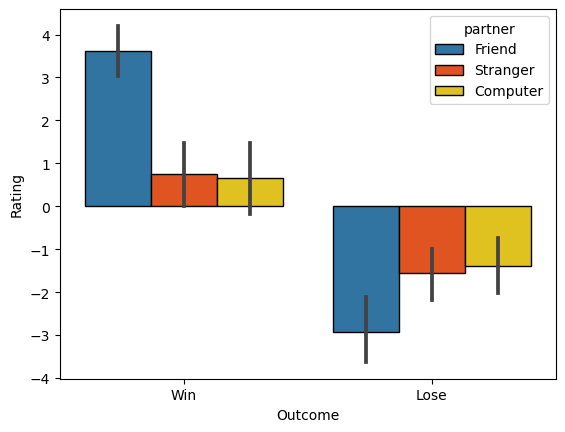

In [52]:
Trait = {0:'Win', 1:'Lose'}
partner = {3:'Friend',2:'Stranger',1:'Computer'}
srpr_df_dropped['partner']=srpr_df_dropped['Partner'].map(partner)
srpr_df_dropped['Outcome']=srpr_df_dropped['Trait'].map(Trait)
srpr_df_dropped
fig = sns.barplot(y='Rating',x='Outcome',hue='partner', data=srpr_df_dropped, palette=['tab:blue','orangered','gold'], edgecolor='black', linewidth = 1)
#plt.savefig('../../istart-sharedreward/derivatives/Figures/partner_ratings_anova.svg')
plt.show()

## Linear Regression with post-scan ratings and individual difference covariates (repeated and plotted in R)

In [53]:
ratings_lm = ols("Win_F_C ~ SU + RS + RS_square + SU:RS + SU:RS_square", data=df_psr).fit()
df_psr.to_csv('../../istart-sharedreward/derivatives/df_psr.csv', index = False)

sm.stats.anova_lm(ratings_lm, typ=2)
ratings_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_F_C   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1.805
Date:                Wed, 26 Jul 2023   Prob (F-statistic):              0.136
Time:                        18:52:21   Log-Likelihood:                -103.86
No. Observations:                  43   AIC:                             219.7
Df Residuals:                      37   BIC:                             230.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.1852      0.464      6.861      0.000       2.245       4.126
SU               0.0405      0.363      0.112      0.912      -0.695       0.776
RS               0.2198      0.166      1.322      0.194      -0.117       0.557
RS_square        0.1403      0.068      2.068      0.046       0.003       0.278
SU:RS           -0.1442      0.154     -0.936      0.355      -0.456       0.168
SU:RS_square     0.0239      0.051      0.474      0.639      -0.078       0.126
==============================================================================
Omnibus:                        0.006   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.159
Skew:                          -0.008   Prob(JB):                        0.924
Kurtosis:                       2.702   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Outputting df of all covariates for PALM analysis of pre-registered hypotheses involving social closeness (IOS) and substance use interaction

In [13]:
iosxSU = df_ios.ios_diff_stranger * df_ios.SU
df_ios['iosxSU'] = iosxSU

iosxRS = df_ios.ios_diff_stranger * df_ios.RS
df_ios['iosxRS'] = iosxRS

iosxRS_square = df_ios.ios_diff_stranger * df_ios.RS_square
df_ios['iosxRS_square'] = iosxRS_square


ratings_lm = ols("pTPJ_R_P_F_S ~ ios_diff_stranger + SU + RS + RS_square + iosxSU + iosxRS + iosxRS_square + SUxRS + SUxRS_sq + tsnr + fd_mean", data=df_ios).fit()

sm.stats.anova_lm(ratings_lm, typ=2)
ratings_lm.summary()

#exporting matrix of regressors, and VS-pTPJ connectivity data for friend v stranger contrasts (col 1. reward; col 2. reward v punishment)

df_mat = df_ios[['sub','ios_diff_stranger','SU','RS','RS_square','iosxSU','iosxRS','iosxRS_square','SUxRS','SUxRS_sq','tsnr','fd_mean']].copy()
df_mat.to_csv('../../istart-sharedreward/derivatives/palm_ios/df_mat.csv', index = False) #note: column for main effect added manually after export
df_palm_ppi = df_ios[['pTPJ_R_F_S','pTPJ_R_P_F_S']].copy()
df_palm_ppi.to_csv('../../istart-sharedreward/derivatives/palm_ios/df_palm_ppi.csv', index = False, header = False)

C:\Users\tup54227\AppData\Local\Temp\ipykernel_8276\2363003398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ios['iosxSU'] = iosxSU
C:\Users\tup54227\AppData\Local\Temp\ipykernel_8276\2363003398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ios['iosxRS'] = iosxRS
C:\Users\tup54227\AppData\Local\Temp\ipykernel_8276\2363003398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

# Outputting df of all VS-TPJ contrasts for Rstudio Analyses

In [54]:
df_TPJ = df[['sub','aTPJ_R_P_F_C', 'aTPJ_R_P_F_S','pTPJ_R_P_F_C','pTPJ_R_P_F_S']].copy()
df_TPJ.to_excel('../../istart-sharedreward/derivatives/df_TPJ.xlsx', index = False)
len(df_TPJ)

45